In [1]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 5862, done.
remote: Total 5862 (delta 0), reused 0 (delta 0), pack-reused 5862
Receiving objects: 100% (5862/5862), 13.40 MiB | 27.95 MiB/s, done.
Resolving deltas: 100% (3948/3948), done.


In [2]:
%cd keras-retinanet/
!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=170780 sha256=9f81679d1b46378d013c3c3bee7c4969b4ab3f4ef31cffbac2fc0a5b91b686a6
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13346 sha256=2c6a2b1b9106aef322b631d5d7288d599a7b4687e43316ad40142ab6f268d339
  Stored in directory: /root/.cache/pip/wheels/80/dd/ac/842235b63dddac12faa4b48ebe58b8944e8c2e57c2e38dddb6
Successfully built keras-retinanet keras-resnet


In [3]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/keras_retinanet
creating build/temp.linux-x86_64-3.6/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.linux-x86_64-3.6/keras_retinanet/utils/compute_over

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import urllib
import os
from PIL import Image

from keras_retinanet import models
from keras_retinanet.utils.image import preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

In [5]:
urllib.request.urlretrieve(
    'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5',
    'pretrained_model.h5')

('pretrained_model.h5', <http.client.HTTPMessage at 0x7fa427e8b940>)

In [6]:
model = models.load_model('pretrained_model.h5')

Using TensorFlow backend.


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [7]:
import os
class_names = os.path.isfile('https://drive.google.com/file/d/1pkkX_Ej9X3vc947aZhj1Oal8qI30UiUl/view?usp=sharing')

In [8]:
from google.colab import drive
drive.mount('/content/drive')
class_names = [l.rstrip() for l in open('/content/drive/My Drive/coco_categories.txt.txt')]
class_names

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [9]:
def show_image_with_predictions(img_path, threshold=0.4):
  im = np.array(Image.open(img_path))
  print("im.shape:", im.shape)

  im = im[:,:,:3]
  imp = preprocess_image(im)
  imp, scale = resize_image(im)
  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(imp, axis=0)
  )
  boxes /= scale
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score < threshold:
      break
    box = box.astype(np.int32)
    color = label_color(label)
    draw_box(im, box, color=color)
    class_name = class_names[label]
    caption = f"{class_name} {score:.3f}"
    draw_caption(im, box, caption)
  plt.axis('off')
  plt.imshow(im)
  plt.show()

In [10]:
plt.rcParams['figure.figsize'] = [20, 10]

In [11]:
!wget https://cdn6.dissolve.com/p/D1061_17_370/D1061_17_370_1200.jpg

--2020-07-17 13:11:54--  https://cdn6.dissolve.com/p/D1061_17_370/D1061_17_370_1200.jpg
Resolving cdn6.dissolve.com (cdn6.dissolve.com)... 13.32.81.105, 13.32.81.121, 13.32.81.117, ...
Connecting to cdn6.dissolve.com (cdn6.dissolve.com)|13.32.81.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119830 (117K) [image/jpeg]
Saving to: ‘D1061_17_370_1200.jpg’

D1061_17_370_1200.j 100%[===================>] 117.02K  --.-KB/s    in 0.1s    

2020-07-17 13:11:55 (1.13 MB/s) - ‘D1061_17_370_1200.jpg’ saved [119830/119830]



im.shape: (800, 1200, 3)


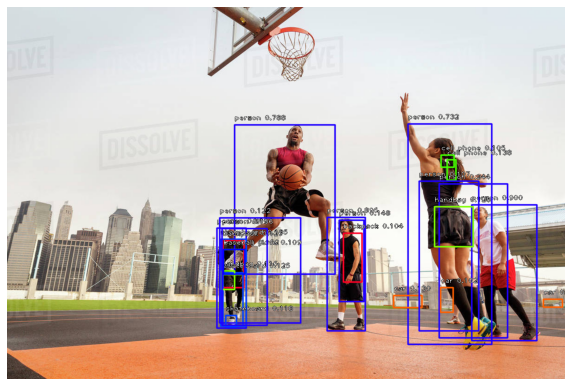

In [12]:
show_image_with_predictions('D1061_17_370_1200.jpg' , threshold = 0.1)

In [24]:
!wget https://i.pinimg.com/564x/94/41/27/944127ea27e8a7f5a0b334c5d71d4a6b.jpg

--2020-07-17 13:25:25--  https://i.pinimg.com/564x/94/41/27/944127ea27e8a7f5a0b334c5d71d4a6b.jpg
Resolving i.pinimg.com (i.pinimg.com)... 104.118.221.72, 2600:1402:e:2ab::1931, 2600:1402:e:280::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|104.118.221.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56242 (55K) [image/jpeg]
Saving to: ‘944127ea27e8a7f5a0b334c5d71d4a6b.jpg’

944127ea27e8a7f5a0b 100%[===================>]  54.92K  --.-KB/s    in 0.1s    

2020-07-17 13:25:26 (424 KB/s) - ‘944127ea27e8a7f5a0b334c5d71d4a6b.jpg’ saved [56242/56242]



im.shape: (319, 564, 3)


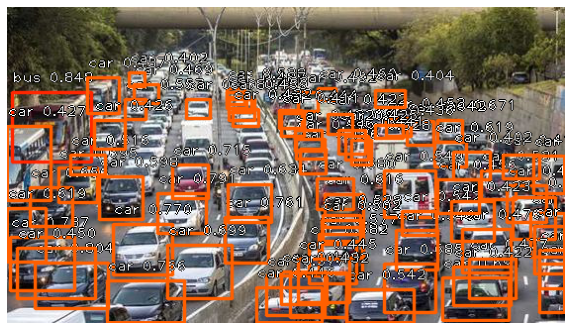

In [27]:
show_image_with_predictions('944127ea27e8a7f5a0b334c5d71d4a6b.jpg',threshold=0.4)

In [15]:
!wget https://cdn.theatlantic.com/static/mt/assets/food/RTR2LP34edit.jpg

--2020-07-17 13:12:29--  https://cdn.theatlantic.com/static/mt/assets/food/RTR2LP34edit.jpg
Resolving cdn.theatlantic.com (cdn.theatlantic.com)... 199.232.66.133
Connecting to cdn.theatlantic.com (cdn.theatlantic.com)|199.232.66.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229391 (224K) [image/jpeg]
Saving to: ‘RTR2LP34edit.jpg’

RTR2LP34edit.jpg    100%[===================>] 224.01K  --.-KB/s    in 0.05s   

2020-07-17 13:12:29 (4.20 MB/s) - ‘RTR2LP34edit.jpg’ saved [229391/229391]



im.shape: (350, 600, 3)


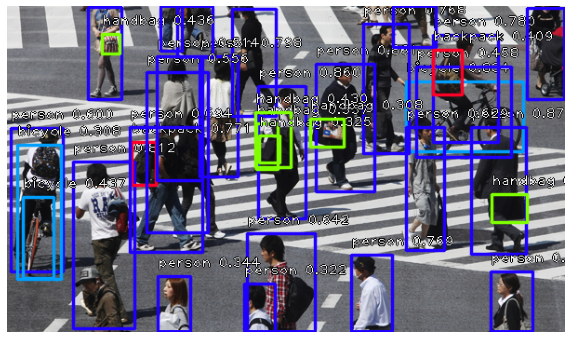

In [16]:
show_image_with_predictions('RTR2LP34edit.jpg' , threshold=0.3)

In [17]:
!wget https://www.midnitesformaniacs.com/wp-content/uploads/2017/01/miyazaki.jpg

--2020-07-17 13:12:43--  https://www.midnitesformaniacs.com/wp-content/uploads/2017/01/miyazaki.jpg
Resolving www.midnitesformaniacs.com (www.midnitesformaniacs.com)... 192.232.218.157
Connecting to www.midnitesformaniacs.com (www.midnitesformaniacs.com)|192.232.218.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57328 (56K) [image/jpeg]
Saving to: ‘miyazaki.jpg’

miyazaki.jpg        100%[===================>]  55.98K  --.-KB/s    in 0.1s    

2020-07-17 13:12:44 (396 KB/s) - ‘miyazaki.jpg’ saved [57328/57328]



im.shape: (640, 640, 3)


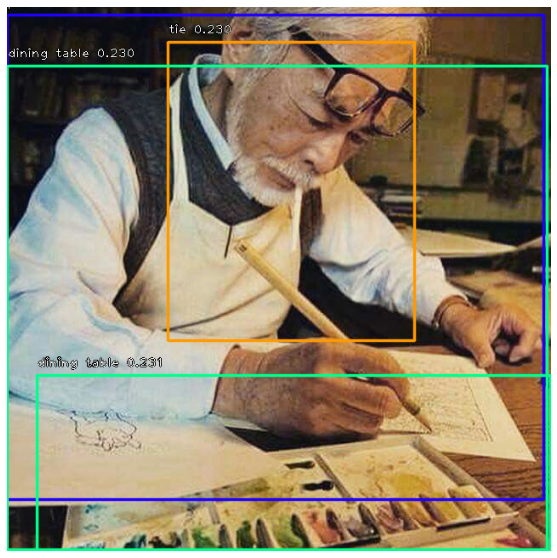

In [18]:
show_image_with_predictions('miyazaki.jpg' , threshold=0.2)